# dev for Getting intersections of curves in numpy

In [1]:
#pylab
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pylab import imshow, show

import skimage as sk
from skimage import measure, filters

import matplotlib.pyplot as plt, numpy as np, os
from numba import njit, jit, vectorize
from PIL import Image
import imageio
# import cv2 as cv

#automate the boring stuff
from IPython import utils
import time, os, sys, re
beep = lambda x: os.system("echo -n '\\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()
width = 512
height = 512
channel_no = 3

#load the libraries
from lib.operari import *
from lib.ProgressBar import *
from lib.minimal_model import *
from lib.TexturePlot import *
from lib.get_tips import *
from lib.minimal_model import *
from lib.intersection import *
#TODO: use cuda via numba
from numba import jit, njit, vectorize, cuda, uint32, f8, uint8
from numba.typed import List
# from lib.contours_to_tips import *

%autocall 1
%load_ext autoreload
%autoreload 2

100000
Automatic calling is: Smart


### runtime speedtest results

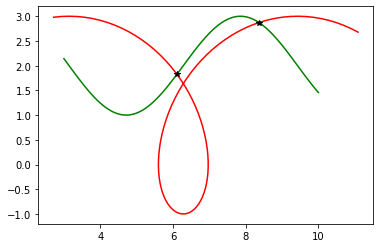

In [6]:
a, b = 1, 2
phi = np.linspace(3, 10, 100)
x1 = a*phi - b*np.sin(phi)
y1 = a - b*np.cos(phi)

x2=phi
y2=np.sin(phi)+2
tips = intersection(x1,y1,x2,y2)
x,y = tips

plt.plot(x1,y1,c='r')
plt.plot(x2,y2,c='g')
plt.plot(x,y,'*k')
plt.show()

- without numba = 3.34 seconds

In [ ]:
%time
tips = intersection(x1,y1,x2,y2)

# create figures for intersection algorithm
- written completely in numpy
- input types work with numba.njit or numba.cuda.jit when using tuple(contours_a or b)

In [ ]:
S1, S2, S3, S4 = _rect_inter_inner(x1, x2)
S5, S6, S7, S8 = _rect_inter_inner(y1, y2)

In [ ]:
fig, axs = plt.subplots(2,4)#,figsize=(8,4))
a = list(axs[0])
a.extend(list(axs[1]))
S_lst = (S1,S2,S3,S4,S5,S6,S7,S8)
for n,ax,S in list(zip(range(len(S_lst)), a, S_lst)):
#     print(ax)
    ax.imshow(S)
    ax.axis('off')
    ax.set_title(f'$S{n+1}$')
fig.savefig('Figures/fast_intersection_coordinates.svg')

In [ ]:
C1 = np.less_equal(S1, S2)
C2 = np.greater_equal(S3, S4)
C3 = np.less_equal(S5, S6)
C4 = np.greater_equal(S7, S8)

fig, axs = plt.subplots(1,4)#,figsize=(8,4))
# a = list(axs[0])
# a.extend(list(axs[1]))
a = axs
S_lst = (C1,C2,C3,C4)
for n,ax,S in list(zip(range(len(S_lst)), a, S_lst)):
#     print(ax)
    ax.imshow(S)
    ax.axis('off')
    ax.set_title(f'$C{n+1}$')
fig.savefig('Figures/fast_intersection_booleans.pdf')

In [ ]:
a, b = 1, 2
phi = np.linspace(3, 10, 100)
x1 = a*phi - b*np.sin(phi)
y1 = a - b*np.cos(phi)

x2=phi
y2=np.sin(phi)+2
tips = intersection(x1,y1,x2,y2)
x,y = tips
plt.figure(figsize=(4,4))
plt.plot(y1,x1,c='r')
plt.plot(y2,x2,c='g')
plt.plot(y,x,'*b')
plt.axis('off')
# plt.show()
plt.savefig('Figures/fast_intersection_example.svg')

# Don't spend time on this: make/test rotate function for exception handling in intersect()
_application: retry funny intersection calls with a 45º rotation_<br>
if intersections(x) fails:
    return $R^{-1}\text{intersections}(X)R$ for rotation by pi/4 in out-of-plane axis<br>
`scipy.ndimage.rotate(input, angle, axes=(1, 0), reshape=True, output=None, order=3, mode='constant', cval=0.0, prefilter=True)`

In [293]:
print(padded_txt.shape)
print(dtexture_dt.shape)

(1024, 1024)
(512, 512, 3)


# make intersection enforce pbc!!
- DONE: Make a naive padded texture that enforces periodic boundary conditions
- DONE: get tips = intersection(padded_texture)
- DONE: map tips to original xy coordinates.  do they agree?
- DONE: remove duplicate tips
- DONE: ^put all that into a function and test it

In [9]:
#Make a naive padded texture that enforces periodic boundary conditions
txt = np.load(f'Data/buffer_chaos_circle6_sigma_5_threshold_0.6_wrapping_true_at_time_5400.0.npy')
dtexture_dt = 0.*txt.copy()
get_time_step(txt,dtexture_dt)

edge_tolerance = 0
pad = 0
sigma = 1
threshold = 0.95

padded_txt, dpadded_txt_dt = textures_to_padded_textures(txt, dtexture_dt,pad=pad)

print(padded_txt.shape)
print(dpadded_txt_dt.shape)

#compute contours. type 1 = contours_raw, type 2 = contours_incimg_nxt = padded_txt.copy()
# img_inc = ifilter(dtexture_dt[...,0])  #mask of instantaneously increasing voltages 
# img_nxt = txt[...,0].copy()

img_nxt = padded_txt.copy()
img_inc = ifilter(dpadded_txt_dt)  #mask of instantaneously increasing voltages 

img_inc = filters.gaussian(img_inc,sigma=sigma)
contours_raw = measure.find_contours(img_nxt, level=0.5,fully_connected='low',positive_orientation='low')
contours_inc = measure.find_contours(img_inc, level=threshold)#,fully_connected='low',positive_orientation='low')


In [81]:
#very slow
tips = get_tips(contours_raw, contours_inc)


In [82]:
tips_mapped = map_pbc_tips_back(tips=tips, pad=pad, width=width, height=height, 
                  edge_tolerance=edge_tolerance, atol = 1e-11)

In [83]:
# tips
# tuple(zip(tips_mapped[0],tips_mapped[1]))
# print (tips[1]) 
print(padded_txt[0,:6])
print(padded_txt[0,-6:])

[0.51681319 0.49312792 0.46235195 0.42440005 0.38164578 0.33705901]
[0.58550024 0.57815575 0.56990235 0.56036974 0.5489939  0.53489344]


The x_list detected by get_tips on the unpadded textures are (34 tips) <br>

[[97.09100036936267], [6.147513107552889, 72.9712105344682], [64.41088440865616, 48.041481491625134], [15.321762048943697], [90.23568160583304], [148.81825606463659], [139.53699886287677, 157.87528232611476], [147.05, 138.17267758272294], [221.78214291697648, 270.10350930274546], [257.6795760796632, 226.16001885811693], [295.5212744425695, 261.13572707114207], [292.4127169493853, 308.7858943227497], [372.22666780365154, 323.43091702925756], [363.1027731905096, 340.0836437030766], [312.1554280372389, 292.1349729032081], [368.40060866420106, 412.47552567350823], [485.320695779018, 462.0097089747627], [468.76870711104664, 461.19162917845125], [502.8042469061117], [510.71235915950126]]

The x_list detected by tips_mapped on the padded textures are (46 tips) <br>

[102.03178111879681,
 6.178445577096028,
 72.7063691838318,
 12.95,
 509.1984411398587,
 63.70516270841419,
 52.45438698581663,
 87.39300706936189,
 146.95,
 145.1615729239311,
 148.32046251012093,
 138.21855444000835,
 155.95,
 153.278359121454,
 154.227517039747,
 142.05,
 140.88082255684958,
 219.20890476452686,
 271.44901484526616,
 256.96459429798955,
 230.3249528346799,
 291.2810586859305,
 268.0121830319035,
 290.3843458648987,
 306.95,
 360.7651425654818,
 326.7193879129269,
 363.2081572055908,
 360.2682219642845,
 359.73210151834667,
 357.3931498365929,
 351.4570694001409,
 349.6537914133702,
 310.95,
 291.2836458239073,
 356.95,
 360.35394286793223,
 367.04881462801967,
 410.95,
 481.86158760515406,
 465.5514456331589,
 468.76870711104664,
 462.53551529392786,
 505.04999999999995,
 504.606425482708,
 504.04999999999995]

__Good Check__: tips_mapped has an x location that is very stable as I vary pad and rejection_distance? __Yes__

* pad =100 and rejection_distance = 30 yielded
4.757124477254536,
314.11883924529235,

* pad =100 and rejection_distance = 60 yielded
4.757124477254536,
314.11883924529235,

* pad =10 and rejection_distance = 6 yielded
4.757124477254536,
314.11883924529235,
 
* pad =0 and rejection_distance = 0 yielded
4.757124477254592,
314.11883924529235,<br>
#^that small difference came from the gaussian filter without b.c.'s I'd bet

In [84]:
print(count_tips(tips_mapped[2]))
tips_mapped[2]

34


[94.40598356654313,
 4.757124477254592,
 70.59466606577625,
 63.46909489276186,
 50.09620885066247,
 15.45556769905707,
 93.92799490929426,
 148.6264747980347,
 142.27515946218438,
 158.27770971960348,
 145.05953489102177,
 139.0844938765144,
 223.9352840239717,
 266.9757498435436,
 257.0868653172777,
 228.23974488425034,
 297.9859671764745,
 262.56554019044415,
 296.08708631528293,
 310.0086162886364,
 369.4868153147052,
 326.20033903241574,
 360.8296343352165,
 340.38624515466046,
 314.11883924529235,
 293.78258592717316,
 370.075292022259,
 412.1725760338893,
 487.1431335079494,
 464.2220087946094,
 468.8446973234902,
 458.14358634237806,
 505.41412966736465,
 508.1188092991977]

__Good Check__: Does map_pbc_tips_back produce positions consistent with get_tips? __Yes__
* pad =0 and rejection_distance = 0 yielded from get_tips
4.757124477254592
314.11883924529235,

* pad =0 and rejection_distance = 0 yielded from map_pbc_tips_back
4.757124477254592,
314.11883924529235,<br>
#^that small difference came from the gaussian filter without b.c.'s I'd bet

In [86]:
print(count_tips(tips[1]))
tips[1]

34


[[94.40598356654313],
 [4.757124477254592, 70.59466606577625],
 [63.46909489276186, 50.09620885066247],
 [15.45556769905707],
 [93.92799490929426],
 [148.6264747980347],
 [142.27515946218438, 158.27770971960348],
 [145.05953489102177, 139.0844938765144],
 [223.9352840239717, 266.9757498435436],
 [257.0868653172777, 228.23974488425034],
 [297.9859671764745, 262.56554019044415],
 [296.08708631528293, 310.0086162886364],
 [369.4868153147052, 326.20033903241574],
 [360.8296343352165, 340.38624515466046],
 [314.11883924529235, 293.78258592717316],
 [370.075292022259, 412.1725760338893],
 [487.1431335079494, 464.2220087946094],
 [468.8446973234902, 458.14358634237806],
 [505.41412966736465],
 [508.1188092991977]]

In [480]:
print(count_tips(tips[1]))
tips[1]

36


[[100.41175720986475],
 [7.281759284472582, 74.03625776607166],
 [64.95, 50.809320893227735],
 [14.95],
 [89.39645976171033],
 [148.95, 146.11218723209987, 146.80580926370595],
 [139.65806825274547, 157.95],
 [146.05, 140.17623719718864],
 [221.32255973192264, 272.27239924634904],
 [258.2020080698836, 228.70568684253377],
 [294.3217182123119, 263.603777887945],
 [292.1946101968355, 308.95],
 [371.4803618267939, 326.402129735965],
 [364.1027731905096, 341.455422716949],
 [312.95, 292.53822341213527],
 [368.6302264195384, 412.95],
 [483.9784470005337, 464.6164473125706],
 [469.76870711104664, 463.1320310072285],
 [506.33764147270784],
 [509.05]]

In [509]:
pad
100.41175720986475 - 104.03178111879681

-3.620023908932069

In [487]:
7.281759284472582 - 6.147513107552889

1.1342461769196923

In [488]:
64.41088440865616 - 64.95

-0.5391155913438439

In [444]:
def nested_list_to_tuple(numba_lst):
    normal_list = []
    for lst in numba_lst:
        normal_list.append(list(lst))
    return normal_list

In [ ]:
#make file for logging results
output_dir = nb_dir+'/Data/Log'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
    
output_fn = 'test-pbc-tips-1.csv'
output_file = get_incremented_output_filename(output_dir, output_fn)
# with open(output_file, 'w') as opened_file:
#     opened_file.write('s1,s2,t,x,y\n')
# with open(output_file, 'a') as opened_file:
#     s1_lst, s2_lst, x_lst, y_lst = map_pbc_tips_back(tips=tips, pad=pad, width=width, height=height, 
#                   edge_tolerance=edge_tolerance, atol = 1e-11)
#     stdout = str((str(tuple(s1_lst)),str(tuple(s2_lst)),float(np.around(tme, 2)),str(tuple(x_lst)),str(tuple(y_lst))))[1:-1]+'\n'
#     stdout.replace("\'",'''\"''')
    #     stdout = str((float(np.around(tme, 2)),tuple(s1_lst),tuple(s2_lst),tuple(x_lst),tuple(y_lst)))[1:-1]+'\n'
    opened_file.write(stdout.replace("\'",'''\"'''))
    
#     printProgressBar(step + 1, nsteps, prefix = 'Progress:', suffix = 'Complete', length = 50)

In [655]:
# tips

sigma = 0.1 and threshold = 0.95.


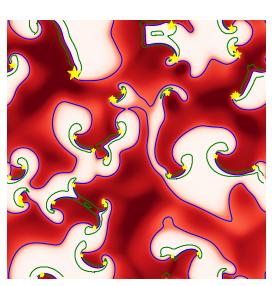

0

In [501]:
n_lst, x_lst, y_lst = get_tips(contours_raw, contours_inc)
tip_states = {'n': n_lst, 'x': x_lst, 'y': y_lst}
print(f"sigma = {sigma} and threshold = {threshold}.")
fig = plot_buffer(img_nxt, img_inc, contours_raw, contours_inc, tips, 
                  figsize=(5,5),max_marker_size=200, lw=1);
plt.grid('on')
plt.show()
beep(2)

In [26]:
# import pandas as pd

# @njit
# def unpad(X, pad, width, rejection_distance):
#     '''unpads 1 coordinate x or y for the padding: 
#     [0... pad | pad ... width + pad | width + pad ... width + 2 * pad]
#     return -9999 if X is within rejection_distance of the edge,
#     return X if X is in [pad ... width + pad], which is if X is in the unpadded frame, which has width = width
#     else return X reflected onto the unpadded frame'''
#     P  = rejection_distance
#     X -= pad
#     if X < -P:
#         X = -9999 # throw out X later
#     elif X < 0:
#         X += width
#     if X > width+P:
#         X = -9999 # throw out X later
#     elif X >= width:
#         X -= width
#     return X

In [47]:
#padded spiral tips are produced with at pixel percision of about 13 digits.
# note that this is not the same as accuracy, which will depend on sigma, threshold, and V_threshold

# test functions for unpad
assert(0==unpad(X=20, pad=20, width=500, rejection_distance=10))
assert(unpad(X=19, pad=20, width=500, rejection_distance=10)==499)
assert(280==unpad(X=300, pad=20, width=500, rejection_distance=10))
assert(499==unpad(X=519, pad=20, width=500, rejection_distance=10))
assert(10==unpad(X=530, pad=20, width=500, rejection_distance=10))
assert(-9999==unpad(X=531, pad=20, width=500, rejection_distance=10))
assert(490==unpad(X=10, pad=20, width=500, rejection_distance=10))
assert(-9999==unpad(X=9, pad=20, width=500, rejection_distance=10))

In [50]:
# @njit
# def unpad_xy_position (position, pad_x, width, rejection_distance_x, 
#                        pad_y, height, rejection_distance_y):
#     x = unpad(X=position[0], pad=pad_x, width=width, rejection_distance=rejection_distance_x)
#     y = unpad(X=position[1], pad=pad_y, width=height, rejection_distance=rejection_distance_y)
#     return x,y    

In [165]:
# def my_numba_list_to_python_list(numba_lst):
#     normal_list = []
#     for lst in numba_lst:
#         normal_list.append(list(lst))
#     return normal_list

In [365]:
unpad(X=499, pad=0, width=500, rejection_distance=0)

499

In [170]:
# tme = 0.038838388


In [177]:
# y_lst
#                     's': tuple(n_lst)})


# (unsuccessful) using a context manager to log tips (slows down sim significantly and doesn't make files that pandas imports easily.


In [255]:
# #make file for logging results
# output_dir = nb_dir+'/Data/Log'
# if not os.path.exists(output_dir):
#     os.mkdir(output_dir)
    
# output_fn = 'test-pbc-tips-1.csv'
# output_file = get_incremented_output_filename(output_dir, output_fn)
# with open(output_file, 'w') as opened_file:
#     opened_file.write('s1,s2,t,x,y\n')


# with open(output_file, 'a') as opened_file:
# #     s1_lst, s2_lst, x_lst, y_lst = map_pbc_tips_back(tips=tips, pad=pad, width=width, height=height, 
# #                   edge_tolerance=edge_tolerance, atol = 1e-11)
# #     stdout = str((str(tuple(s1_lst)),str(tuple(s2_lst)),float(np.around(tme, 2)),str(tuple(x_lst)),str(tuple(y_lst))))[1:-1]+'\n'
# #     stdout.replace("\'",'''\"''')
#     #     stdout = str((float(np.around(tme, 2)),tuple(s1_lst),tuple(s2_lst),tuple(x_lst),tuple(y_lst)))[1:-1]+'\n'
#     opened_file.write(stdout.replace("\'",'''\"'''))
    
# #     printProgressBar(step + 1, nsteps, prefix = 'Progress:', suffix = 'Complete', length = 50)
# beep(3)

In [257]:
# s_mapped_lst, x_mapped_lst, y_mapped_lst = tips_mapped



In [248]:
# float(np.around(tme, 2))
# str(tuple(s1_lst)),str(tuple(s2_lst)),str(tuple(x_lst)),str(tuple(y_lst))


'/Users/timothytyree/Documents/GitHub/care/notebooks/Data/Log/test-pbc-tips-9.csv'

In [88]:
test_fn = 'Data/tip_log_from_ic_600x600.101_at_time_308.5.csv'
# pd.read_csv(test_fn)

100000


In [87]:
# np.argwhere(xy_lst,xy)
# pd.read_csv(output_file)#, tupleize_cols=True)

In [ ]:
# {'x':tips_mapped[1], 'y': tips_mapped[2]}
# tips_mapped[1:]#'s':list(tips_mapped[0])
print(tips_mapped[2])
# df = pd.DataFrame(tips_mapped[1:])#, columns=['s','x','y'])

In [254]:
series = pd.Series(x_mapped_lst)
tol = 1.e-12 #greater than to 5.e-14
error_array = np.diff(np.sort(series[series.duplicated()]))
print(error_array[error_array<tol])

[0.00000000e+00 0.00000000e+00 5.68434189e-14 3.41060513e-13
 0.00000000e+00 0.00000000e+00 5.68434189e-14 5.68434189e-14
 1.13686838e-13 5.68434189e-14 5.68434189e-14 0.00000000e+00]


In [255]:
series = pd.Series(y_mapped_lst)
tol = 1.e-12 #greater than to 5.e-14
error_array = np.diff(np.sort(series[series.duplicated()]))
print(error_array[error_array<tol])

[0.00000000e+00 0.00000000e+00 5.68434189e-14 5.68434189e-14
 0.00000000e+00 0.00000000e+00]


In [195]:
#now remove duplicates
xy_zipped = [xy for xy in zip(x_mapped_lst, y_mapped_lst)]

In [214]:
# xy_df.drop_duplicates(subset=['x','y'])
len(s_mapped_lst)

60

In [217]:
len(x_mapped_lst)

60

In [227]:
s_tips[0]

(0, 0)

In [262]:
len(tips_mapped[0])

60

## helper functions for intersect

In [867]:
# def _rectangle_intersection_(x1, y1, x2, y2):
#     S1, S2, S3, S4 = _rect_inter_inner(x1, x2)
#     S5, S6, S7, S8 = _rect_inter_inner(y1, y2)

#     C1 = np.less_equal(S1, S2)
#     C2 = np.greater_equal(S3, S4)
#     C3 = np.less_equal(S5, S6)
#     C4 = np.greater_equal(S7, S8)

#     ii, jj = np.nonzero(C1 & C2 & C3 & C4)
#     return ii, jj
import inspect

In [870]:
print(inspect.getsource(intersection))

def _rect_inter_inner(x1, x2):
    n1 = x1.shape[0]-1
    n2 = x2.shape[0]-1
    
    minx1 = _min_within(x1,n1)
    maxx1 = _max_within(x1,n1)
    minx2 = _min_within(x2,n2)
    maxx2 = _max_within(x2,n2)
    
    S1 = np.zeros((n2,n1))
    S3 = S1.copy()
    for j in range(n2):
        S1[j] = minx1
        S3[j] = maxx1
    S2 = np.zeros((n1,n2))
    S4 = S2.copy()
    for j in range(n1):
        S2[j] = maxx2
        S4[j] = minx2
    return S1.T, S2, S3.T, S4



# DONE: optimize intersection.py

In [1077]:
# np.diff(np.column_stack((x1, y1)),axis=0)
from lib.intersection import *

In [643]:
# (sum(X1-X2)==0).all()

In [1041]:
# sum(sum(S1-S1b))==0

# sum(sum(S2-S2b))==0

# sum(sum(S3-S3b))==0

# sum(sum(S4-S4b))==0

array([], dtype=float64)

In [1078]:
_rectangle_intersection_(x1,y1,x2,y2)

(array([], dtype=int64), array([], dtype=int64))

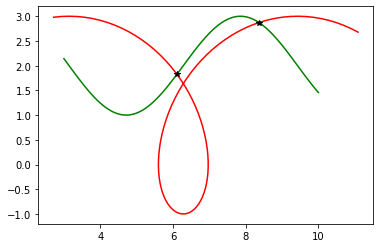

In [1080]:
a, b = 1, 2
phi = np.linspace(3, 10, 100)
x1 = a*phi - b*np.sin(phi)
y1 = a - b*np.cos(phi)

x2=phi
y2=np.sin(phi)+2
x,y=intersection(x1,y1,x2,y2)

plt.plot(x1,y1,c='r')
plt.plot(x2,y2,c='g')
plt.plot(x,y,'*k')
plt.show()

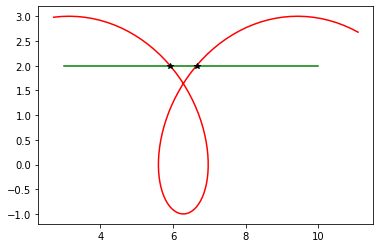

In [1081]:
#test that it works for vertical segments
a, b = 1, 2
phi = np.linspace(3, 10, 100)
x1 = a*phi - b*np.sin(phi)
y1 = a - b*np.cos(phi)

x2=phi
y2=0.*np.sin(phi)+2
x,y=intersection(x1,y1,x2,y2)

plt.plot(x1,y1,c='r')
plt.plot(x2,y2,c='g')
plt.plot(x,y,'*k')
plt.show()

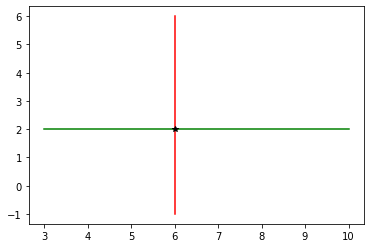

In [1082]:
#test that it works for vertical segments
a, b = 1, 2
phi = np.linspace(3, 10, 100)
x1 = 6.+ 0*phi#a*phi - b*np.sin(phi)
y1 = phi-4#a - b*np.cos(phi)

x2=phi
y2=0.*np.sin(phi)+2
x,y=intersection(x1,y1,x2,y2)

plt.plot(x1,y1,c='r')
plt.plot(x2,y2,c='g')
plt.plot(x,y,'*k')
plt.show()

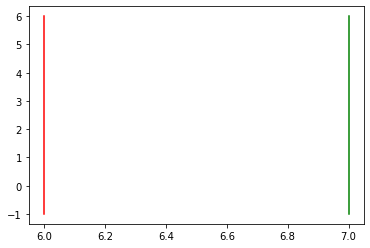

In [1083]:
#test that it works for vertical segments
a, b = 1, 2
phi = np.linspace(3, 10, 100)
x1 = 6.+ 0*phi#a*phi - b*np.sin(phi)
y1 = phi-4#a - b*np.cos(phi)

x2=x1+1.#phi
y2=y1#0.*np.sin(phi)+2
x,y=intersection(x1,y1,x2,y2)

plt.plot(x1,y1,c='r')
plt.plot(x2,y2,c='g')
plt.plot(x,y,'*k')
plt.show()

# optimize get_tips

it looks like the fastest improvement I'm getting is down to about 2 seconds for my use case.  This is because the relatively complicated intersection function needs to get called NxM times for N=num of contour a and M = num of contour b.  This can be improved by quickly checking if an intersection exists.  how might I do this?

#the lowest level function determines if there exists an intersection, and it takes the longest. :(
#pulling it out doesn't speed things up appreciably

I think I can get this (maybe?) O(n^2) intersection algorithm beat with what I was using in the horrible Javascript implementation, which is __O(n)__.

In [ ]:
# from lib.get_tips import *
# from numba import prange

# from lib.intersection import *
# from lib.get_tips import *

In [2]:
#Make a naive padded texture that enforces periodic boundary conditions
txt = np.load(f'Data/buffer_chaos_circle6_sigma_5_threshold_0.6_wrapping_true_at_time_5400.0.npy')
dtexture_dt = 0.*txt.copy()
get_time_step(txt,dtexture_dt)

edge_tolerance = 0
pad = 0
sigma = 1
threshold = 0.95

padded_txt, dpadded_txt_dt = textures_to_padded_textures(txt, dtexture_dt,pad=pad)

print(padded_txt.shape)
print(dpadded_txt_dt.shape)

#compute contours. type 1 = contours_raw, type 2 = contours_incimg_nxt = padded_txt.copy()
# img_inc = ifilter(dtexture_dt[...,0])  #mask of instantaneously increasing voltages 
# img_nxt = txt[...,0].copy()

img_nxt = padded_txt.copy()
img_inc = ifilter(dpadded_txt_dt)  #mask of instantaneously increasing voltages 

img_inc = filters.gaussian(img_inc,sigma=sigma)
contours_raw = measure.find_contours(img_nxt, level=0.5,fully_connected='low',positive_orientation='low')
contours_inc = measure.find_contours(img_inc, level=threshold)#,fully_connected='low',positive_orientation='low')


(512, 512)
(512, 512)


In [8]:
retval = get_tips(tuple(contours_raw),tuple(contours_inc));

In [19]:
# # #original code reference # @njit
# def get_tips(contours_raw, contours_inc):
#     '''returns tips with indices of parent contours'''
#     n_list = []; x_lst = []; y_lst = []
#     for n1, c1 in enumerate(contours_raw):
#         for n2, c2 in enumerate(contours_inc):
#             x1, y1 = (c1[:, 0], c1[:, 1])
#             x2, y2 = (c2[:, 0], c2[:, 1])
#             x, y = intersection(x1, y1, x2, y2)
#             if len(x)>0:
#                 s = (n1,n2)
#                 x = list(x)
#                 y = list(y)
#                 n_list.append(s)
#                 x_lst.append(x)
#                 y_lst.append(y)
#     return n_list, x_lst, y_lst

In [12]:
# # @njit(cache=True)
# def get_tips(contours_a,contours_b):
#     '''returns tips with indices of parent contours returned as the nested list, n_list.
#     contours_a,contours_b are each tuples of m-by-2 np.ndarrays.
#     each member is a 1D line.  
    
#     get_tips returns all intersections of 
#     contours_a with contours_b.  
#     will throw a TypingError exception if either input tuple is empty.
    
#     if you get a nonsingular matrix error, make sure that you`re not comparing a contour to itself.'''
#     n_list = List(); x_list = List(); y_list = List();
#     ncr = len(contours_a); nci = len(contours_b)
#     for n1 in prange(ncr):
#         for n2 in prange(nci):
# #     for n1, c1 in enumerate(contours_a):
# #         for n2, c2 in enumerate(contours_b):
#             c1 = contours_a[n1]
#             c2 = contours_b[n2]
#             x1 = c1[:, 0]
#             y1 = c1[:, 1]
#             x2 = c2[:, 0]
#             y2 = c2[:, 1]
#             x,y = intersection(x1, y1, x2, y2)
#             if len(x)>0:
#                 s = (n1,n2)
#                 xl = list(x)
#                 yl = list(y)
#                 n_list.append(s)
#                 x_list.append(xl)
#                 y_list.append(yl)
#     return n_list, x_list, y_list

In [1355]:
list(retval[1])

[[94.40598356654313],
 [4.757124477254592, 70.59466606577625],
 [63.46909489276186, 50.09620885066247],
 [15.45556769905707],
 [93.92799490929426],
 [148.6264747980347],
 [142.27515946218438, 158.27770971960348],
 [145.05953489102177, 139.0844938765144],
 [223.9352840239717, 266.9757498435436],
 [257.0868653172777, 228.23974488425034],
 [297.9859671764745, 262.56554019044415],
 [296.08708631528293, 310.0086162886364],
 [369.4868153147052, 326.20033903241574],
 [360.8296343352165, 340.38624515466046],
 [314.11883924529235, 293.78258592717316],
 [370.075292022259, 412.1725760338893],
 [487.1431335079494, 464.2220087946094],
 [468.8446973234902, 458.14358634237806],
 [505.41412966736465],
 [508.1188092991977]]

In [1382]:
import numba

In [1377]:
# #maybe a structured dict will be more parallelizable by the compiler
# #nope
# @njit(parallel=True)
# def get_tips(contours_a,contours_b):
#     '''returns tips with indices of parent contours returned as the nested list, n_list.
#     contours_a,contours_b are each tuples of m-by-2 np.ndarrays.
#     each member is a 1D line.  
    
#     get_tips returns all intersections of 
#     contours_a with contours_b.  
#     will throw a TypingError exception if either input tuple is empty.
    
#     if you get a nonsingular matrix error, make sure that you`re not comparing a contour to itself.'''
#     out = Dict()
# #     n_list = List(); x_list = List(); y_list = List();
#     ncr = len(contours_a); nci = len(contours_b)
#     for n1 in prange(ncr):
#         for n2 in prange(nci):
# #     for n1, c1 in enumerate(contours_a):
# #         for n2, c2 in enumerate(contours_b):
#             c1 = contours_a[n1]
#             c2 = contours_b[n2]
#             x1 = c1[:, 0]
#             y1 = c1[:, 1]
#             x2 = c2[:, 0]
#             y2 = c2[:, 1]
#             x,y = intersection(x1, y1, x2, y2)
#             if len(x)>0:
#                 s = (n1,n2)
#                 xl = list(x)
#                 yl = list(y)
#                 out[s]=(xl,yl)
#     return out
# #                 n_list.append(s)
# #                 x_list.append(xl)
# #                 y_list.append(yl)
# #     return n_list, x_list, y_list

In [996]:
x1, y1, x2, y2 = retval
test(x1,y1,x2,y2)
# print(intersection(x1, y1, x2, y2))
# print((x1, y1, x2, y2))
# type(x2)

(array([], dtype=float64), array([], dtype=float64))

In [1398]:
numba.typeof(tuple(contours_raw))
numba.typeof(tuple(contours_inc))

tuple(array(float64, 2d, C) x 24)

In [1364]:
# n_list, x_lst, y_lst = get_tips(tuple(contours_raw), tuple(contours_inc))
d.update?

In [1122]:
a = List()
a.append(1.2)

In [1125]:
print(a)

[1.2]


In [773]:
len(contours_raw)
for c in contours_raw:
    print(c.shape[0])

146
413
727
56
243
226
2248
1400
123
766
614
48
30


In [1222]:
#the lowest level function determines if there exists an intersection, and it takes the longest. :(
#pulling it out doesn't speed things up appreciably
# @njit
# def get_tips_2(contours_a,contours_b):
#     '''returns tips with indices of parent contours returned as the nested list, n_list.
#     contours_a,contours_b are each tuples of m-by-2 np.ndarrays.
#     each member is a 1D line.  
    
#     get_tips returns all intersections of 
#     contours_a with contours_b.  
#     will throw a TypingError exception if either input tuple is empty.
    
#     if you get a nonsingular matrix error, make sure that you`re not comparing a contour to itself.'''
#     n_list = List(); x_list = List(); y_list = List();
#     ncr = len(contours_a); nci = len(contours_b)
#     for n1, c1 in enumerate(contours_a):
#         for n2, c2 in enumerate(contours_b):
#             x1 = c1[:, 0]
#             y1 = c1[:, 1]
#             x2 = c2[:, 0]
#             y2 = c2[:, 1]
#             ii,jj = _rectangle_intersection_(x1, y1, x2, y2)
#             if len(ii)>0:
#                 x,y = _intersection_after_r_i_(x1, y1, x2, y2,ii,jj)
#                 s = (n1,n2)
#                 xl = list(x)
#                 yl = list(y)
#                 n_list.append(s)
#                 x_list.append(xl)
#                 y_list.append(yl)
#     return n_list, x_list, y_list

In [1274]:
@njit(parallel=True)
def _min_within(x,n):
    '''compare every two entries and return the min of the two.
    n = int(x.shape[0] - 1)'''
    out = np.zeros(n, dtype=np.float64)
    for j in prange(n):
        out[j] = min((x[j], x[j+1]))
    return out

In [1262]:
x = np.array([1,2,3,4])

In [1428]:
_min_within(x,3)

array([1., 2., 3.])

In [1429]:
# _min_within.parallel_diagnostics(level=4)